In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import string
ucase = list(string.uppercase)
lcase = list(string.lowercase)

In [3]:
pd.DataFrame([ucase, lcase])

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
1,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z


In [6]:
pd.DataFrame([ucase[:5], lcase[:5]]).T

,0,1
0,A,a
1,B,b
2,C,c
3,D,d
4,E,e


In [10]:
letters = pd.DataFrame({'uppercase':ucase, 'lowercase':lcase})
letters.head()

,lowercase,uppercase
0,a,A
1,b,B
2,c,C
3,d,D
4,e,E


In [11]:
letters.columes = ['lowercase', 'UPPERCASE']
letters.head()

,lowercase,uppercase
0,a,A
1,b,B
2,c,C
3,d,D
4,e,E


In [13]:
letters['numbers'] = np.random.randint(0,10,len(letters))
letters.dtypes

lowercase    object
uppercase    object
numbers       int64
dtype: object

In [32]:
emp = pd.DataFrame(index=[40,50,60])
rst = letters[:5].join(emp, how='outer')
rst

,lowercase,uppercase,numbers
0,a,A,6.0
1,b,B,0.0
2,c,C,6.0
3,d,D,9.0
4,e,E,7.0
40,NaN,NaN,NaN
50,NaN,NaN,NaN
60,NaN,NaN,NaN


In [33]:
rst.numbers.fillna(0, inplace='True')
rst

,lowercase,uppercase,numbers
0,a,A,6.0
1,b,B,0.0
2,c,C,6.0
3,d,D,9.0
4,e,E,7.0
40,NaN,NaN,0.0
50,NaN,NaN,0.0
60,NaN,NaN,0.0


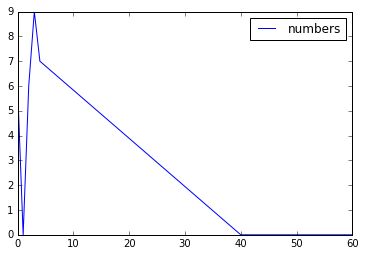

In [26]:
rst.plot() # use matplotlib to plot

### automatic DATE FORMATTING

In [28]:
df = pd.read_csv('filepath', parse_dates=['column_name'])  # into DateTime Format
result_df.to_csv('output_filepath') # save dataframe to csv

In [15]:
from datetime import datetime
d = pd.DataFrame(index=pd.date_range(pd.datetime(2014,8,1), pd.datetime(2014,12,31)))
d.head()

""
2014-08-01
2014-08-02
2014-08-03
2014-08-04
2014-08-05


### rename , reindex

In [34]:
rst.rename(columns={rst.columns[2]:"counts"})

,lowercase,uppercase,counts
0,a,A,6.0
1,b,B,0.0
2,c,C,6.0
3,d,D,9.0
4,e,E,7.0
40,NaN,NaN,0.0
50,NaN,NaN,0.0
60,NaN,NaN,0.0


In [36]:
rst.lowercase.fillna('z', inplace='True')

In [37]:
rst.set_index('lowercase', inplace='True')
rst

,uppercase,numbers
lowercase,,
a,A,6.0
b,B,0.0
c,C,6.0
d,D,9.0
e,E,7.0
z,NaN,0.0
z,NaN,0.0
z,NaN,0.0


In [51]:
rst.reset_index()

,lowercase,uppercase,numbers
0,a,A,6.0
1,b,B,0.0
2,c,C,6.0
3,d,D,9.0
4,e,E,7.0
5,z,NaN,0.0
6,z,NaN,0.0
7,z,NaN,0.0


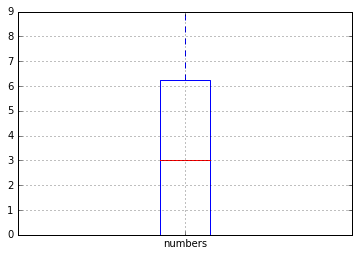

In [41]:
rst.boxplot('numbers')

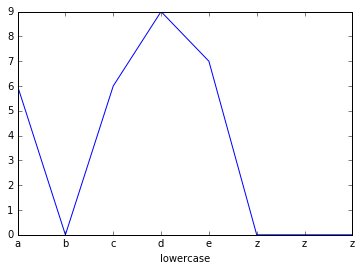

In [42]:
rst.numbers.plot()

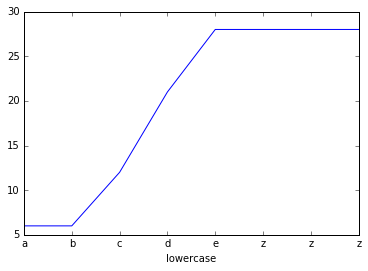

In [52]:
rst.numbers.cumsum().plot()

In [49]:
pd.Series.rolling(rst.numbers, window=2, center=False).mean()   # to get a rolling mean! interesting.

lowercase
a    NaN
b    3.0
c    3.0
d    7.5
e    8.0
z    3.5
z    0.0
z    0.0
Name: numbers, dtype: float64

In [50]:
pd.Series.rolling(rst.numbers, window=2, center=False).sum()   # to get a rolling sum

lowercase
a     NaN
b     6.0
c     6.0
d    15.0
e    16.0
z     7.0
z     0.0
z     0.0
Name: numbers, dtype: float64